In [1]:
!pip install selenium

You should consider upgrading via the 'c:\users\91890\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# Importing Libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

# Importing selenium webdriver 
from selenium import webdriver

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

# question 1

In [3]:
# Activating the chrome browser
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

# Opening the homepage of Amazon.in
url = "https://www.amazon.in/"
driver.get(url)

time.sleep(2)
# Asking the user to input the keywords he/she wants to search
user_inp = input('Enter the product you want to search : ')

Enter the product you want to search : guitar


In [6]:
product_vertical='guitar'

In [7]:
search_bar = driver.find_element_by_id("twotabsearchtextbox")    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys(user_inp)                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//div[@class="nav-search-submit nav-sprite"]/span/input')       # Locating search_button by xpath
search_button.click()                                                                # Clicking the button to start search

# question 2

In [8]:
# scrape all product urls
product_urls = []
start=0
end=3
for page in range(start,end):#for loop for scrapping 3 page
    url=driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')       #scraping urls
    for i in url:
        product_urls.append(i.get_attribute("href"))                        #appending the urls in product_urls list
    nxt_button=driver.find_element_by_xpath("//li[@class='a-last']//a")     #scraping the list of buttons from the page
    driver.get(nxt_button.get_attribute('href'))


In [9]:
#Make empty lists
Brand = []   
Name = []
Rating = []
no_of_ratings = []
Price = []
Return = []
expected_delivery = []
Availability = [] 
Other_Details = []

In [10]:




for url in product_urls:
    driver.get(url)
    time.sleep(2)
    
    # Extracting Brand from xpath
    try:
        brand = driver.find_element_by_xpath('//a[@id="bylineInfo"]')      
        Brand.append(brand.text)
    except NoSuchElementException:
        Brand.append('-')    


    time.sleep(1)
    # Extracting name from id
    try:
        name = driver.find_element_by_id('productTitle')      
        Name.append(name.text)
    except NoSuchElementException:
        Name.append('-')


    time.sleep(1)    
    # Extracting Ratings from xpath    
    try:
        rating = driver.find_element_by_xpath('//span[@class="a-size-base a-nowrap"]//span')  
        Rating.append(rating.text)
    except NoSuchElementException:
        Rating.append('-')


    time.sleep(1)
    # Extracting No of Ratings from xpath
    try:
        no_rating = driver.find_element_by_id('acrCustomerReviewText')  
        no_of_ratings.append(no_rating.text)
    except NoSuchElementException:
        no_of_ratings.append('-')


    time.sleep(1)
    # Extracting price from xpath    
    try:
        price = driver.find_element_by_xpath('//td[@class="a-span12"]')  
        Price.append(price.text)
    except NoSuchElementException:
        Price.append('-')


    time.sleep(1)
    # Extracting Return from xpath
    try:
        return_ = driver.find_element_by_xpath('//a[@class="a-size-small a-link-normal a-text-normal"]')  
        Return.append(return_.text)
    except NoSuchElementException:
        Return.append('-')


    time.sleep(1)
    # Extracting expected_delivery from xpath
    try:
        exptd_dlvry= driver.find_element_by_xpath('//span[@class="a-color-error"]')  
        expected_delivery.append(exptd_dlvry.text)
    except NoSuchElementException:
         expected_delivery.append('-')


    time.sleep(1)
    # Extracting Availability from xpath         
    try:
        avl= driver.find_element_by_xpath('//span[@class="a-size-medium a-color-success"]')  
        Availability.append(avl.text)
    except NoSuchElementException:
        Availability.append('-')



    time.sleep(1)
    # Extracting Other Details from xpath    
    try:
        othr_dtls= driver.find_element_by_xpath('//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')  
        Other_Details.append(othr_dtls.text)
    except NoSuchElementException:
        Other_Details.append('-')



In [11]:
  
# Make dataframe
prod_df = pd.DataFrame({'Brand':Brand,'Name':Name,'Rating':Rating,'No. of ratings':no_of_ratings,'Price':Price,
                        'Return/Exchange':Return,'Expected Delivery':expected_delivery,'Availability':Availability,
                        'Other Details':Other_Details,'URL':product_urls})
prod_df

,Brand,Name,Rating,No. of ratings,Price,Return/Exchange,Expected Delivery,Availability,Other Details,URL
0,Visit the Kadence Store,Kadence Acoustica Series Semi Acoustic Ash Woo...,4 out of 5,598 ratings,"₹7,199.00",Pay on Delivery,-,In stock.,Product Type : Acoustic Guitar Fretboard mater...,https://www.amazon.in/gp/slredirect/picassoRed...
1,Visit the Kadence Store,"Kadence Frontier Series,Blue Acoustic Guitar W...",4 out of 5,259 ratings,"₹5,499.00",Pay on Delivery,-,In stock.,"Product Type : Acoustic Guitar\nBrand:Kadence,...",https://www.amazon.in/gp/slredirect/picassoRed...
2,Visit the JUAREZ Store,JUAREZ 38 Inch Acoustic Guitar with Dual Actio...,3.3 out of 5,40 ratings,"₹3,179.00",Pay on Delivery,-,In stock.,"Glossy finish, Number of frets - 18, 38 Inch A...",https://www.amazon.in/gp/slredirect/picassoRed...
3,Visit the Kadence Store,Kadence Slowhand Premium Jumbo Semi Acoustic G...,4.3 out of 5,230 ratings,"₹11,999.00",Pay on Delivery,-,In stock.,QUALITY STRINGS ---The surface is coated with ...,https://www.amazon.in/gp/slredirect/picassoRed...
4,Visit the JUAREZ Store,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"11,327 ratings","₹2,649.00",Pay on Delivery,-,In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...,...,...,...
174,Brand: hd fashion,hd fashion 4 String Decor Guitar Children's Mu...,5 out of 5,1 rating,₹699.00,7 Days Replacement,-,In stock.,Very Crisp and Clear Sound of Strings\nThis gu...,https://www.amazon.in/fashion-Childrens-Instru...
175,Visit the JUAREZ Store,"Juarez JRZ-ST02 6-String Electric Guitar, Righ...",4 out of 5,150 ratings,"₹5,759.00",Pay on Delivery,-,In stock.,Number of Frets: 18\nGreat looks with an innov...,https://www.amazon.in/Juarez-JRZ-ST01-6-String...
176,Brand: Asago,Asago 4 String Children's Musical Guitar Instr...,3 out of 5,4 ratings,₹799.00,7 Days Replacement,,In stock.,♥ This guitar has good sound quality and good ...,https://www.amazon.in/Asago-Childrens-Instrume...
177,Brand: Generic,Whitleys Mini Acoustic Guitar 23 Inch 6 String...,-,-,"₹2,237.00",7 Days Replacement,,-,Mini 23 inch Wood 6 Strings Acoustic Guitar Mu...,https://www.amazon.in/Whitleys-Acoustic-Beginn...


# question 3

Write a python program to access the search bar and search button on images.google.com and
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.


In [49]:
# Activating the chrome browser
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

# Opening the homepage of Amazon.in
url = " https://images.google.com/"
driver.get(url)

time.sleep(2)

In [51]:
#user inputs
user_inp1='fruits'
user_inp2='cars'
user_inp3='Machine Learning'


In [52]:
#access the search bar and search button

search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys(user_inp1)                                   # sending user input to search bar

search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click()                                                                # Clicking the button to start search

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1VXGCyLKk_U8qzQ31abMiOSM3lg953_Qw3A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvrLOYzDpbFNPnpVcM10KGQWzibR5O9MAGcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpOS6K8MU7vUTwsr3qJOaA65r88DKNoQ35HA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5LFpAD-FPmniqb8OCMo64l4q87A37IN6UMQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRkU62g7Rhz3aNupBoOc6pizY-19hH9-MJKA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWShvZgyNR29CrJJKSA3MdMJtKDaS-B-_6dw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqGCFdiGDgPD1F_ySnkokL6RLHJLPKcPjyGw&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
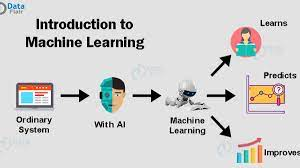
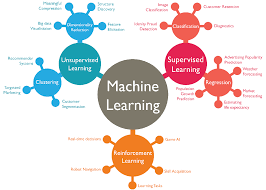
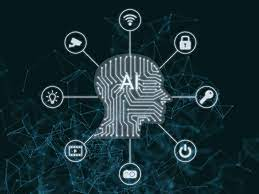
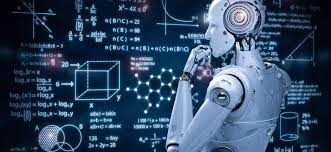
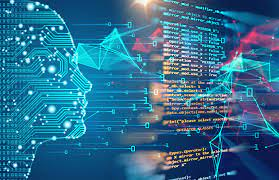
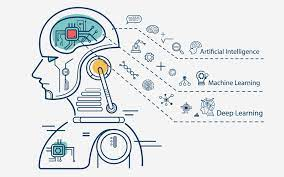
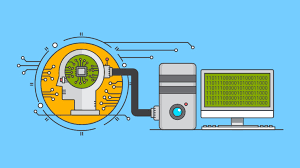
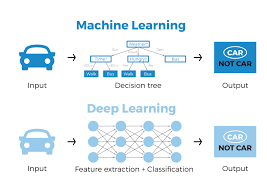
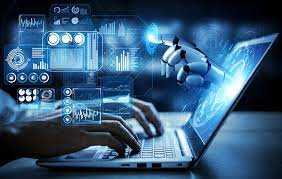
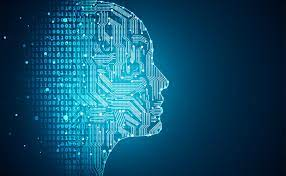
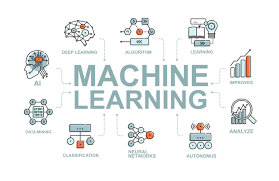
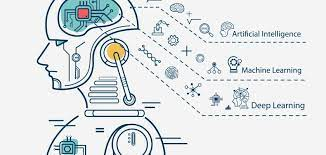
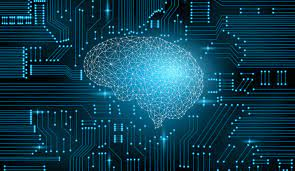
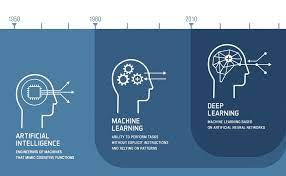
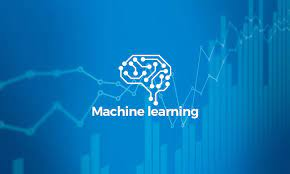
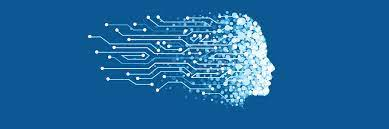
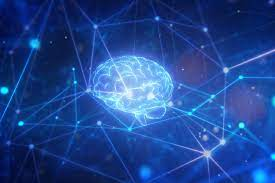
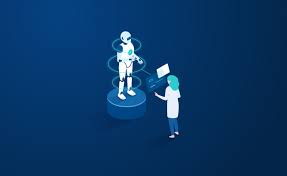
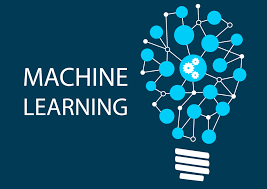
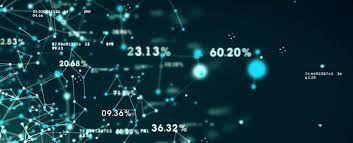

In [74]:
#scrapping images of fruits
list=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')

image_fruits=[]
for img in list:
      image_fruits.append(img.get_attribute("src"))
        
image_fruits

In [65]:
search_bar = driver.find_element_by_xpath('//input[@class="og3lId"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys(user_inp2)                                   # sending user input to search bar

time.sleep(2)

search_button = driver.find_element_by_xpath('//button[@class="rCGXm"]')   # Locating search_button by xpath
search_button.click()                                                      # Clicking the button to start search

In [67]:
#scrapping images of cars
list=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')

image_cars=[]
for img in list:
      image_cars.append(img.get_attribute("src"))
        
image_cars

[<selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="bc56901e-ce35-43f7-995c-9eeaa2f1a8b8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="14446d28-e956-4a48-80d4-1fe0ed1a0245")>,
 <selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="82fafb34-d0c3-400f-8443-95d168cb67d6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="460e5b5f-7ba5-4589-813c-a099a39ca1bc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="a1b5e501-c4c9-4098-be33-76b0adde0806")>,
 <selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="386346e4-6988-493b-83d9-75989d4ad163")>,
 <selenium.webdriver.remote.webelement.WebElement (session="91d17c8676b62f134b8239fbcb127a7c", element="3449c604-e391-4c48-98b2-18

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1VXGCyLKk_U8qzQ31abMiOSM3lg953_Qw3A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvrLOYzDpbFNPnpVcM10KGQWzibR5O9MAGcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpOS6K8MU7vUTwsr3qJOaA65r88DKNoQ35HA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5LFpAD-FPmniqb8OCMo64l4q87A37IN6UMQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRkU62g7Rhz3aNupBoOc6pizY-19hH9-MJKA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWShvZgyNR29CrJJKSA3MdMJtKDaS-B-_6dw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqGCFdiGDgPD1F_ySnkokL6RLHJLPKcPjyGw&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
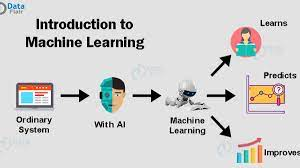
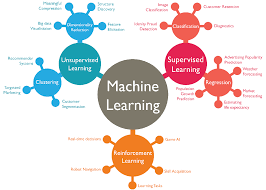
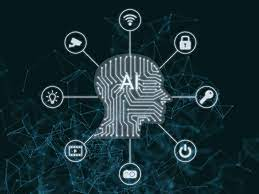
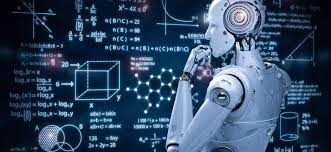
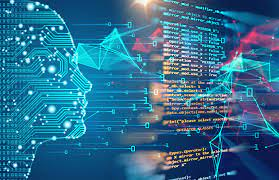
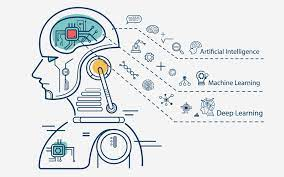
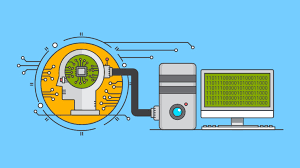
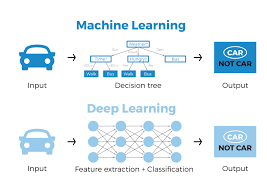
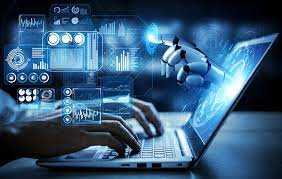
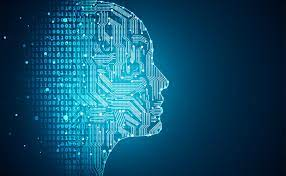
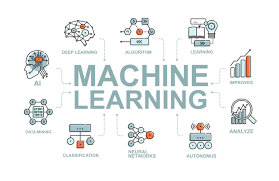
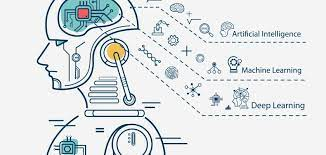
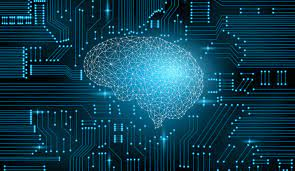
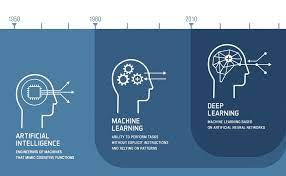
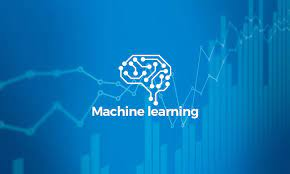
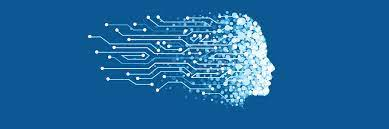
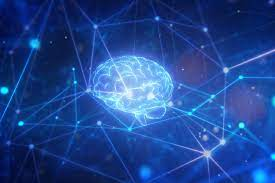
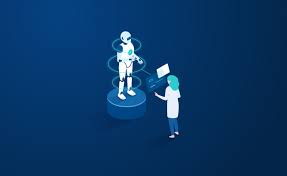
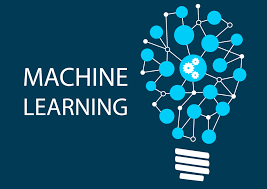
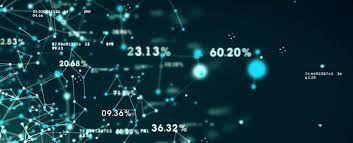

In [73]:
search_bar = driver.find_element_by_xpath('//input[@class="og3lId"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys(user_inp3)                                   # sending user input to search bar

time.sleep(2)

search_button = driver.find_element_by_xpath('//button[@class="rCGXm"]')   # Locating search_button by xpath
search_button.click() 

list=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')

image_ML=[]
for img in list:
      image_ML.append(img.get_attribute("src"))
        
image_ML

# question 4

Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page.
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”,
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”.
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe
and CSV

In [22]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = "https://www.flipkart.com/"
driver.get(url)

time.sleep(2)


login_pop = driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
login_pop.click()

time.sleep(2)

#locating the search bar
search_bar=driver.find_element_by_class_name("_3704LK")
search_bar.send_keys('oneplus 9 pro')

time.sleep(2)
#locating the button and clicking it toh search for sunglasses
button=driver.find_element_by_class_name('L0Z3Pu')
button.click()


time.sleep(3)

In [23]:
#scrapping all product Url
product_url = []

url=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in url:
    product_url.append(i.get_attribute('href'))

In [5]:
# scraping brand_name from each product url
brand_name_title=[]
for product in product_url:
    driver.get(product)
    try:
        brand_name =driver.find_element_by_xpath("//span[@class='B_NuCI']")
        brand_name_title.append(brand_name.text)
    except NoSuchElementException:
         brand_name_title.append("No Discount")  
        

brand_name_title

['Itel A25 Pro (Gradation Blue, 32 GB)  (2 GB RAM)',
 'Itel A25 Pro (Gradation Purple, 32 GB)  (2 GB RAM)',
 'Itel A25 Pro (Gradation Green, 32 GB)  (2 GB RAM)',
 'Itel A23 Pro (Sapphire Blue, 8 GB)  (1 GB RAM)',
 'No Discount',
 'REDMI Note 10 Pro Max (Dark Night, 128 GB)  (6 GB RAM)',
 'Itel A23 Pro (Lake Blue, 8 GB)  (1 GB RAM)',
 'OPPO F19 Pro (Fluid Black, 128 GB)  (8 GB RAM)',
 'OPPO F19 Pro (Crystal Silver, 128 GB)  (8 GB RAM)',
 'Itel vision 1 pro (OCEAN BLUE, 32 GB)  (2 GB RAM)',
 'OPPO F19 Pro (Fantastic Purple, 128 GB)  (8 GB RAM)',
 'Itel vision 1 pro (AURORA BLUE, 32 GB)  (2 GB RAM)',
 'Redmi Note 9 Pro (Champagne Gold, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 Pro Max (Vintage Bronze, 128 GB)  (8 GB RAM)',
 'OPPO Reno5 Pro 5G (Astral Blue, 128 GB)  (8 GB RAM)',
 'Panasonic Eluga Z1 Pro (Gold, 64 GB)  (4 GB RAM)',
 'APPLE iPhone 11 Pro (Midnight Green, 64 GB)',
 'REDMI Note 9 Pro Max (Interstellar Black, 64 GB)  (6 GB RAM)',
 'OPPO Reno3 Pro (Sky White, 128 GB)  (8 GB RAM)',
 

In [25]:
ram_title=[]
rom_title=[]
Primary_Camera_title=[]
Secondary_Camera_title=[]
Display_Size_WIDTH_title=[]
Display_Size_HEIGHT_title=[]
Processor_TYPE_title=[]
Processor_CORE_title=[]
Battery_Capacity_title=[]
PRICE_title=[]


for product in product_url:
    driver.get(product)
    
    #ram 
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        ram=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul/li')
        ram_title.append(ram.text)
    except NoSuchElementException:
         ram_title.append("---")  
        
    #rom
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        rom=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[3]/td[2]/ul/li')
        rom_title.append(rom.text)
    except NoSuchElementException:
         rom_title.append("---")  
            
    #Primary Camera
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Primary_Camera=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li')
        Primary_Camera_title.append( Primary_Camera.text)
    except NoSuchElementException:
        Primary_Camera_title.append("---")  
    
       
    #Secondary Camera
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Secondary_Camera=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[4]/td[2]/ul/li')
        Secondary_Camera_title.append(Secondary_Camera.text)
    except NoSuchElementException:
        Secondary_Camera_title.append("---")  
    
    
    #Display_Size_WIDTH
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Display_Size_WIDTH=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[11]/table/tbody/tr[1]/td[2]/ul/li')
        Display_Size_WIDTH_title.append(Display_Size_WIDTH.text)
    except NoSuchElementException:
        Display_Size_WIDTH_title.append("---")  
        
    #Display_size_height
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Display_Size_HEIGHT=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[11]/table/tbody/tr[2]/td[2]/ul/li')
        Display_Size_HEIGHT_title.append(Display_Size_HEIGHT.text)
    except NoSuchElementException:
        Display_Size_HEIGHT_title.append("---")  
        
        
    #Processor_TYPE
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Processor_TYPE=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[11]/table/tbody/tr[2]/td[2]/ul/li')
        Processor_TYPE_title.append(Processor_TYPE.text)
    except NoSuchElementException:
        Processor_TYPE_title.append("---")  
     
    #Processor_CORE
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Processor_CORE=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[11]/table/tbody/tr[2]/td[2]/ul/li')
        Processor_CORE_title.append(Processor_CORE.text)
    except NoSuchElementException:
        Processor_CORE_title.append("---")  
        
     
    #Battery_Capacity
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        Battery_Capacity=driver.find_element_by_xpath(' /html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[10]/table/tbody/tr/td[2]/ul/li')
        Battery_Capacity_title.append(Battery_Capacity.text)
    except NoSuchElementException:
        Battery_Capacity_title.append("---")  
        
    #PRICE
    try:
        button=driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')
        button.click()
        PRICE=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[11]/table/tbody/tr[2]/td[2]/ul/li')
        PRICE_title.append(PRICE.text)
    except NoSuchElementException:
        PRICE_title.append("---")  

In [26]:
#creating a dataframe
df=pd.DataFrame({'brand name':brand_name_title,
                'ram_title':ram_title,
                'rom_title':rom_title,
                'Primary_Camera_title':Primary_Camera_title,
                'Secondary_Camera_title':Secondary_Camera_title,
                'Display_Size_WIDTH_title':Display_Size_WIDTH_title,
                'Display_Size_HEIGHT_title':Display_Size_HEIGHT_title,
                'Processor_TYPE_title':Processor_TYPE_title,
                'Processor_CORE_title':Processor_CORE_title,
                'Battery_Capacity_title':Battery_Capacity_title,
                'Price':PRICE_title})
#printing dataframe
df

,brand name,ram_title,rom_title,Primary_Camera_title,Secondary_Camera_title,Display_Size_WIDTH_title,Display_Size_HEIGHT_title,Processor_TYPE_title,Processor_CORE_title,Battery_Capacity_title,Price
0,"Itel A25 Pro (Gradation Blue, 32 GB) (2 GB RAM)",2 GB,---,---,---,---,---,---,---,---,---
1,"Itel A25 Pro (Gradation Purple, 32 GB) (2 GB ...",2 GB,---,---,---,---,---,---,---,---,---
2,"Itel A25 Pro (Gradation Green, 32 GB) (2 GB RAM)",---,---,---,---,---,---,---,---,---,---
3,"Itel A23 Pro (Sapphire Blue, 8 GB) (1 GB RAM)",---,---,---,---,---,---,---,---,---,---
4,No Discount,---,---,---,---,---,---,---,---,---,---
5,"REDMI Note 10 Pro Max (Dark Night, 128 GB) (6...",---,---,---,---,---,---,---,---,---,---
6,"Itel A23 Pro (Lake Blue, 8 GB) (1 GB RAM)",---,---,---,---,---,---,---,---,---,---
7,"OPPO F19 Pro (Fluid Black, 128 GB) (8 GB RAM)",---,---,---,---,---,---,---,---,---,---
8,"OPPO F19 Pro (Crystal Silver, 128 GB) (8 GB RAM)",---,---,---,---,---,---,---,---,---,---
9,"Itel vision 1 pro (OCEAN BLUE, 32 GB) (2 GB RAM)",---,---,---,---,---,---,---,---,---,---


In [27]:
# converting dataframe into csv
df.to_csv(r'oneplusphone.csv', index = False, header = True)

# question 5

Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on
google maps.

In [52]:
# import Action chains
from selenium.webdriver import ActionChains

# create action chain object
action = ActionChains(driver)

In [42]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = "https://www.google.co.in/maps/@13.0712493,77.6421572,15z"
driver.get(url)

time.sleep(2)


In [43]:
# Asking the user to input the keywords he/she wants to search
user_inp = input('Enter the city you want to search : ')

Enter the city you want to search : bangalore


In [44]:
#putting input city in search box and searching
Place = driver.find_element_by_class_name("tactile-searchbox-input")
Place.send_keys(user_inp)
Submit = driver.find_element_by_xpath("/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button")
Submit.click()

In [38]:
# clicking on zoom button

try:
    button=driver.find_element_by_xpath('//button[@id="widget-zoom-in"]')
    button.click()
    
except NoSuchElementException:
    print("zoom button not found")

In [54]:
#right clicking to get corrdinates
canvas=driver.find_element_by_xpath('//canvas[@class="widget-scene-canvas"]')


# question 6


Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in

In [55]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = "https://trak.in/"
driver.get(url)

time.sleep(2)

In [58]:
funding_deal=driver.find_element_by_link_text("Funding Deals")
funding_deal.click()

In [68]:
#scrape july 2020
july = driver.find_elements_by_xpath('//div[@id="tablepress-48_wrapper"]')

july_name=[]
for i in july:
    july_name.append(i.text.replace("\n"," "))
    
july_name

["Show 10 25 50 100 entries Search: Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD) 1 15/07/2020 Flipkart E-commerce E-commerce Bangalore Walmart Inc M&A 1,200,000,000 2 16/07/2020 Vedantu EduTech Online Tutoring Bangalore Coatue Management Series D 100,000,000 3 16/07/2020 Crio EduTech Learning Platform for Developers Bangalore 021 Capital pre-Series A 934,160 4 14/07/2020 goDutch FinTech Group Payments Mumbai Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq. Seed 1,700,000 5 13/07/2020 Mystifly Airfare Marketplace Ticketing, Airline Retailing, and Post-Ticketing Services Singapore and Bangalore Recruit Co. Ltd.  pre-Series B 3,300,000 6 09/07/2020 JetSynthesys Gaming and Entertainment Gaming and Entertainment  Pune Adar Poonawalla and Kris Gopalakrishnan. Venture-Series Unknown 400,000 7 10/07/2020 gigIndia Marketplace Crowd Sourcing, Freelance Pune Incubate Fund I

In [75]:
#scrape august 2020
august = driver.find_elements_by_xpath('//div[@id="tablepress-48_wrapper"]')

august_name=[]
for i in august:
    august_name.append(i.text.replace("\n"," "))
    
august_name

["Show 10 25 50 100 entries Search: Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD) 1 15/07/2020 Flipkart E-commerce E-commerce Bangalore Walmart Inc M&A 1,200,000,000 2 16/07/2020 Vedantu EduTech Online Tutoring Bangalore Coatue Management Series D 100,000,000 3 16/07/2020 Crio EduTech Learning Platform for Developers Bangalore 021 Capital pre-Series A 934,160 4 14/07/2020 goDutch FinTech Group Payments Mumbai Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq. Seed 1,700,000 5 13/07/2020 Mystifly Airfare Marketplace Ticketing, Airline Retailing, and Post-Ticketing Services Singapore and Bangalore Recruit Co. Ltd.  pre-Series B 3,300,000 6 09/07/2020 JetSynthesys Gaming and Entertainment Gaming and Entertainment  Pune Adar Poonawalla and Kris Gopalakrishnan. Venture-Series Unknown 400,000 7 10/07/2020 gigIndia Marketplace Crowd Sourcing, Freelance Pune Incubate Fund I

In [76]:
#scrape september 2020
september = driver.find_elements_by_xpath('//div[@id="tablepress-50_wrapper"]')

september_name=[]
for i in september :
    september_name.append(i.text.replace("\n"," "))
    
september_name

["Show 10 25 50 100 entries Search: Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD) 1 08/09/2020 Byju’s EduTech Online Tutoring Bangalore Silver Lake, Tiger Global, General Atlantic and Owl Ventures Private Equity 500,000,000 2 12/09/2020 mCaffeine Personal Care Skincare & Haircare Mumbai Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1 Series B 3,000,000 3 09/09/2020 Qshala EduTech Online Curiosity Platform for Kids Bangalore Rainmatter Capital Angel 370,000 4 02/09/2020 Winzo Online Gaming Online Gaming New Delhi Kalaari Capital Partners, IndigoEdge Management Consultancy Series B 15,500,000 5 09/09/2020 Hippo Video Video Customer Experience(CX) Platform Video Customer Experience(CX) Platform Newark, Delaware, United States of Amercia Alpha Wave Incubation, Exfinity Venture Partners and existing backers. Series A 4,500,000 6 07/09/2020 Melorra E-co

# question 7

Write a program to scrap all the available details of best gaming laptops from digit.in

In [116]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = "https://www.digit.in/"
driver.get(url)

time.sleep(2)

In [117]:
#locating the button and clicking it toh search for sunglasses
button=driver.find_element_by_class_name('search')
button.click()
time.sleep(2)

#locating the search bar
search_bar=driver.find_element_by_id("globalPageSearchText")
search_bar.clear()     
search_bar.send_keys('Gaming Laptops')
time.sleep(2)

#clicking enter key through keyboard
from selenium.webdriver.common.keys import Keys
driver.find_element_by_id("globalPageSearchText").send_keys(Keys.ENTER)

In [118]:
#scrapping all product Url
product_url = []

url=driver.find_elements_by_xpath("//div[@class='searchPage']//a[contains(@href,'')]")

for i in url:
    product_url.append(i.get_attribute('href'))
    
product_url

['https://www.digit.in/laptops/asus-g53j-a-3d-gamer-s-delight-but-we-want-more-price-3465.html',
 'https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/lenovo-ideapad-y570-price-2979.html',
 'https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html',
 'https://www.digit.in/audio-video/asus-rog-cetra-price-213419.html',
 'https://www.digit.in/laptops/hp-pavilion-g6-multimedia-and-gaming-on-a-budget-price-3088.html',
 'https://www.digit.in/laptops/asus-rog-flow-x13-price-229735.html',
 'https://www.digit.in/tvs/truvision-tx3271-price-69451.html',
 'https://www.digit.in/laptops/asus-zephyrus-g15-ryzen-9-5900hs-2021-price-231905.html',
 'https://www.digit.in/laptops/lenovo-g50-30-price-6793.html']

In [121]:
title_title=[]
laptop_description_title=[]
PRICE_title=[]

for url in product_url:
    driver.get(url)
    time.sleep(2)
    
    #title 
    try:
        title=driver.find_element_by_xpath('//div[@class="heading-wraper"]')
        title_title.append(title.text)
    except NoSuchElementException:
         title_title.append("---")  
        
    #laptop_description
    try:
        laptop_description=driver.find_element_by_xpath('//div[@id="MoreLink_content-container-new"]')
        laptop_description_title.append(laptop_description.text)
    except NoSuchElementException:
        laptop_description_title.append("---")  
            
    #PRICE
    try:
        PRICE=driver.find_element_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[4]/div[1]/b')
        PRICE_title.append(PRICE.text)
    except NoSuchElementException:
        PRICE_title.append("---")  
        
        
    

In [125]:
# Make dataframe
prod_df = pd.DataFrame({'Title':title_title,'laptop_description':laptop_description_title,'Price':PRICE_title})
prod_df

,Title,laptop_description,Price
0,ASUS G53J - A 3D Gamer'S Delight But We Want M...,The ASUS G53J does not compare well with any o...,"112,499"
1,HP Envy 15-K006tx\nहिन्दी >\n+ COMPARE,Another heavy duty gaming laptop that bludgeon...,"80,510"
2,Lenovo IdeaPad Y570\nहिन्दी >\n+ COMPARE,The Lenovo IdeaPad Y570 is a solid home entert...,"49,900"
3,Asus G750JX-CV069P\nहिन्दी >\n+ COMPARE,"Another, no-holds barred, uninterrupted gaming...","149,999"
4,ASUS ROG Cetra\nहिन्दी >\n+ COMPARE,After the immense popularisation of wireless h...,"7,699"
5,HP Pavilion G6 - Multimedia And Gaming On A Bu...,The HP Pavilion g6 is aimed at the casual game...,"45,000"
6,ASUS ROG Flow X13\nहिन्दी >\n+ COMPARE,ASUS unleashed a series of laptops recently in...,"154,990"
7,Truvison TX3271\nहिन्दी >\n+ COMPARE,Truvision TX3271 is a 32-inch Smart Full HD LE...,"23,490"
8,ASUS Zephyrus G15 Ryzen 9 5900HS (2021)\nहिन्द...,Alongside the ROG Flow x13 convertible gaming ...,"137,990"
9,Lenovo G50-30\nहिन्दी >\n+ COMPARE,The Lenovo G series of laptops are aimed at bu...,"25,694"


# question 8

Write a python program to scrape the details for all billionaires from www.forbes.com.
Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”,
“Industry”.

In [127]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = "https://www.forbes.com/forbes-400/"
driver.get(url)

time.sleep(2)

In [136]:
person_name_title=[]
rank_title=[]
netWorth_title=[]
state_title=[]

#extracting names
person_name=driver.find_elements_by_xpath('//div[@class="personName"]')
for i in person_name:
    try:
        person_name_title.append(i.text)
    except NoSuchElementException:
        person_name_title.append("--")
    
    

#extracting netWorth
netWorth=driver.find_elements_by_xpath('//div[@class="netWorth"]')    
for i in netWorth:
    try:
        netWorth_title.append(i.text)
    except NoSuchElementException:
        netWorth_title.append("--")

#extracting state
state=driver.find_elements_by_xpath('//div[@class="state"]')    
for i in state:
    try:
        state_title.append(i.text)
    except NoSuchElementException:
        state_title.append("--")

In [143]:
# Make dataframe
prod_df = pd.DataFrame({'Name':person_name_title,'netWorth':netWorth_title,'state':state_title})
prod_df

,Name,netWorth,state
0,Jeff Bezos,$179 B,Washington
1,Bill Gates,$111 B,Washington
2,Mark Zuckerberg,$85 B,California
3,Warren Buffett,$73.5 B,Nebraska
4,Larry Ellison,$72 B,California
...,...,...,...
395,Brad Jacobs,$2.1 B,Connecticut
396,Bruce Karsh,$2.1 B,California
397,Howard Marks,$2.1 B,New York
398,William Stone,$2.1 B,Florida


# question 9

Write a program to extract at least 500 Comments, Comment upvote and time when comment
was posted from any YouTube Video.

In [4]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = "https://www.youtube.com/watch?v=qh46lA1eieU&t=5s"
driver.get(url)

time.sleep(2)

In [39]:
comment=driver.find_elements_by_css_selector('yt-formatted-string')

comment_title=[]
#comments of the video
for i in comment:
    try:
        comment_title.append(i.text)
    except NoSuchElementException:
        comment_title.append("--")


vote_title=[]
#extracting state
vote=driver.find_elements_by_xpath('//span[@id="vote-count-left"]')    
for i in vote:
    try:
        vote_title.append(i.text)
    except NoSuchElementException:
        vote_title.append("--")
        


# question 10

Write a python program to scrape a data for all available Hostels from
https://www.hostelworld.com/ in “London” location. You have to scrape hostel name,
distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms
from price, facilities and property description. 

In [78]:
driver=webdriver.Chrome(r"C:\chromedriver.exe")
time.sleep(3)

url = " https://www.hostelworld.com/"
driver.get(url)

time.sleep(2)

In [79]:
search_bar = driver.find_element_by_xpath('//input[@id="location-text-input-field"]')    # Locating searc_bar by id
search_bar.clear()  # clearing search_bar
search_bar.send_keys("Bangalore")                                   # sending user input to search bar
time.sleep(2)

# import Action chains 
from selenium.webdriver.common.action_chains import ActionChains
  
# import KEYS
from selenium.webdriver.common.keys import Keys

# create action chain object
action = ActionChains(driver)
  
# perform the oepration
action.key_down(Keys.DOWN).perform()
action.key_down(Keys.ENTER).perform()

time.sleep(3)

In [80]:
search_button = driver.find_element_by_xpath('//button[@id="search-button"]')       # Locating search_button by xpath
search_button.click()           
 

In [65]:
#scrapping all hotel Url
hostel_url = []

url=driver.find_elements_by_xpath("//h2[@class='title title-6']//a")

for i in url:
    hostel_url.append(i.get_attribute('href'))
    
hostel_url

['https://www.hostelworld.com/pwa/hosteldetails.php/Hackerpacker-Hostel/Bangalore/292715?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Woke-HSR-Layout/Bangalore/300424?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Be-Animal-Hostel/Bangalore/304804?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Woke-Indiranagar/Bangalore/295670?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Transit-Dorms-A-Backpackers-Inn-Hostel/Bangalore/282262?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Cuckoo-Hostel/Bangalore/304259?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Locul-Central/Bangalore/307605?from=2021-07-24&to=2021-07-27&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Zostel-Bangalore/Bangalore/291305?from=20

In [73]:
hotel_name_title=[]
description_title=[]
ratings_title=[]
total_reviews_title=[]
private_room_prices_title=[]
dorm_room_prices_title=[]


for url in hostel_url:
    driver.get(url)
    time.sleep(2)
     
    try:
        #extracting names
        hotel_name=driver.find_element_by_xpath('//div[@class="title-2"]')
        hotel_name_title.append(hotel_name.text)
    except NoSuchElementException:
        hotel_name_title.append("--")


    
    try:
        #extracting description
        description=driver.find_element_by_xpath('//div[@class="content collapse-content"]')
        description_title.append(description.text)
    except NoSuchElementException:
        description_title.append("--")
        
        
    #extracting ratings
    try:
        ratings=driver.find_element_by_xpath('//div[@class="score orange big"]') 
        ratings_title.append(ratings.text)
    except NoSuchElementException:
        ratings_title.append("--")

     #extracting total_reviews
    try:
        total_reviews=driver.find_element_by_xpath('dev[@class="keyword"]//span')
        total_reviews_title.append(total_reviews.text)
    except NoSuchElementException:
        total_reviews_title.append("--")
        
        
    #private room prices
    try:
        private_room_prices=driver.find_element_by_xpath('//div[@id="rate-437879-price"]')
        private_room_prices_title.append(private_room_prices.text)
    except NoSuchElementException:
        private_room_prices_title.append("--")
        
      #dorm room prices
    try:
        dorm_room_prices=driver.find_element_by_xpath('//div[@id="rate-437879-price"]')
        dorm_room_prices_title.append(dorm_room_prices.text)
    except NoSuchElementException:
        dorm_room_prices_title.append("--")  
    

In [74]:
 # Make dataframe
hostel_df = pd.DataFrame({'names':hotel_name_title,'description':description_title,'Ratings':ratings_title,'total_reviews':total_reviews_title,'private room price':private_room_prices_title,'Dorm room price':dorm_room_prices_title})
hostel_df

        


,names,description,Ratings,total_reviews,private room price,Dorm room price
0,Hackerpacker Hostel,HackerPacker is a Travel & coliving community ...,--,--,--,--
1,Woke HSR Layout,Woke HSR Layout - Stay Play Work.\n\nWoke Bang...,9.9,--,Rs1679.46,Rs1679.46
2,Be Animal Hostel,Be Animal Hostel is the ultimate place for you...,10,--,--,--
3,Woke Indiranagar,Woke Hostel Bangalore - Live it up \n\nWoke Ba...,10,--,--,--
4,Transit Dorms- A Backpackers Inn & Hostel,Transit Dorms is Bangalore’s newest and most c...,--,--,--,--
5,Cuckoo Hostel,"Located in Bangalore, within 2.4 km of Forum M...",9.9,--,--,--
6,Locul.Central,Set in the heart of the Bangalore city. Locul....,9.6,--,--,--
7,Zostel Bangalore,Hotel Policy\n- Please ensure you have read th...,10,--,--,--
8,Draper Startup House For Entrepreneurs Koraman...,Coworking + Coliving + Community + Events & Ac...,9.6,--,--,--
9,The Little Blue Window Hostel,"Comfort & Fun clubbed with Hygienic Standards,...",8.9,--,--,--
